# Part I - (Fordgobike-tripdata)
## by JOY AKINYI

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.colors as col
from IPython.display import display
from pandas.api.types import CategoricalDtype

%matplotlib inline

In [3]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> The dataset has 183412 rows(no of trips) and 16 columns:duration_sec	start_time	end_time	start_station_id	start_station_name	start_station_latitude	start_station_longitude	end_station_id	end_station_name	end_station_latitude	end_station_longitude	bike_id	user_type	member_birth_year	member_gender	bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?
I would  want to know the average time taken in taking the trips hence the duration_sec column is important.The gender of the member is also important as it will help us decide which gender uses bikes more.Also,finding out which user type has the highest count. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 Definitely the start_time and end_time features as it will help me extract days and months from the dataset to see trends in detail.The user type feature is important too.Also,the duration_sec column

## Univariate Exploration


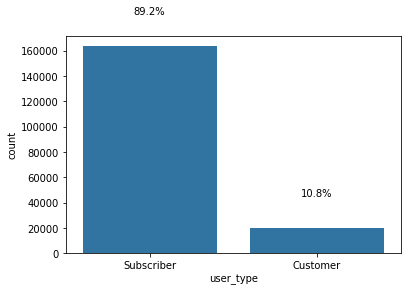

In [4]:
# Obtain the base cokor
base_color = sb.color_palette()[0]
#Obtaining the no of rows since its an object
n_rows = df.shape[0]

user_counts = df['user_type'].value_counts()
user_type_order = df['user_type'].value_counts().index

max_user_count = user_counts[0]
max_prop = max_user_count / n_rows
tick_props = np.arange(0, max_prop+0.2, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data = df, x = 'user_type', color = base_color,order = user_type_order)
#Getting values in percentage
for i in range(user_counts.shape[0]):
    count = user_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_rows)
    plt.text(i, count+25000, pct_string, ha = 'center');

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


Subscribers have a higher count as indicated above(89.2%).This can conclude that bike riding is done by mostly subscribers as compared to customers

In [6]:
# Converting to date format
df['start_time'] = pd.to_datetime(df['start_time'], format = "%Y-%m-%d")
df['end_time'] = pd.to_datetime(df['end_time'], format = "%Y-%m-%d")
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_year'] = df.start_time.dt.strftime('%Y').astype(int)
df['start_month'] = df.start_time.dt.strftime('%m').astype(int)
df['start_hour'] = df.start_time.dt.strftime('%H').astype(int)
df['start_weekday'] = df.start_time.dt.strftime('%w').astype(int)

df['end_date'] = df.end_time.dt.strftime('%Y-%m-%d')
df['end_year'] = df.end_time.dt.strftime('%Y').astype(int)
df['end_month'] = df.end_time.dt.strftime('%m').astype(int)
df['end_hour'] = df.end_time.dt.strftime('%H').astype(int)
df['end_weekday'] = df.end_time.dt.strftime('%w').astype(int)




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 26 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_date                 183412 non-null object
start_year        

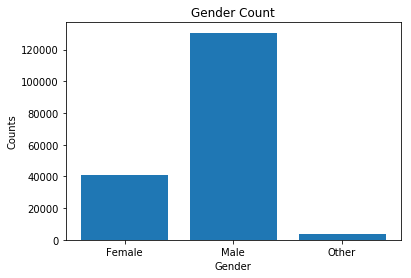

In [8]:
#Finding out which gender has the most count
plt.bar(data=df,x=df['member_gender'].value_counts().index,height=df['member_gender'].value_counts())
plt.ylabel('Counts'),
plt.xlabel('Gender')
plt.title('Gender Count');

Males go for more trips as compared to females and others.This may be because they are be more fit and athletic

In [9]:
#Adding a column for age
df['user_age']=2022 - df['member_birth_year']

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_year,start_month,start_hour,start_weekday,end_date,end_year,end_month,end_hour,end_weekday,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,2019,2,17,4,2019-03-01,2019,3,8,5,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2019,2,18,4,2019-03-01,2019,3,6,5,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2019,2,12,4,2019-03-01,2019,3,5,5,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,2019,2,17,4,2019-03-01,2019,3,4,5,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,2019,2,23,4,2019-03-01,2019,3,0,5,48.0


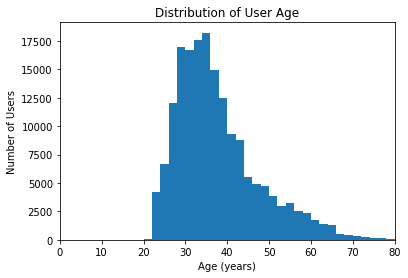

In [11]:
bin_size = 2
bins = np.arange(0, df['user_age'].max()+bin_size, bin_size)
plt.hist(data = df.dropna(), x = 'user_age', bins = bins)
plt.xlim(0,80)
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users');

###### Average number of users per second

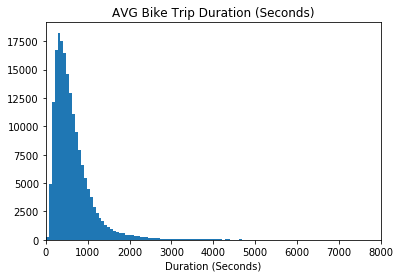

In [12]:
bin_edges = np.arange(0, df['duration_sec'].max() + 100 , 70)
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('AVG Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

Lets convert the duration to minutes to have a deeper look

In [13]:
#Converting the seconds to mins
# Converting the seconds to minutes.
df['duration_min'] = df['duration_sec'] / 60

In [14]:
df['duration_min'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

In [15]:
np.log10(df['duration_min'].describe())

count    5.263428
mean     1.082832
std      1.475766
min      0.007179
25%      0.733732
50%      0.932812
75%      1.122762
max      3.153530
Name: duration_min, dtype: float64

We shall then proceed to pick  the max and min value

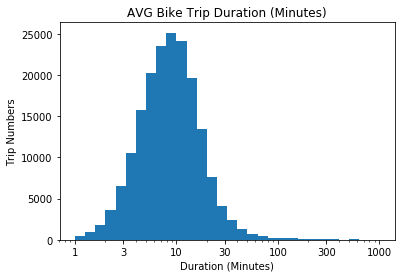

In [16]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('AVG Bike Trip Duration (Minutes)');
plt.ylabel('Trip Numbers');

In [17]:
df["start_time"].max() - df["start_time"].min()

Timedelta('27 days 23:58:57.912000')

In [18]:
df["end_time"].max() - df["end_time"].min()

Timedelta('28 days 07:57:03.917000')

In [19]:
df['start_weekday'].isnull().sum()

0

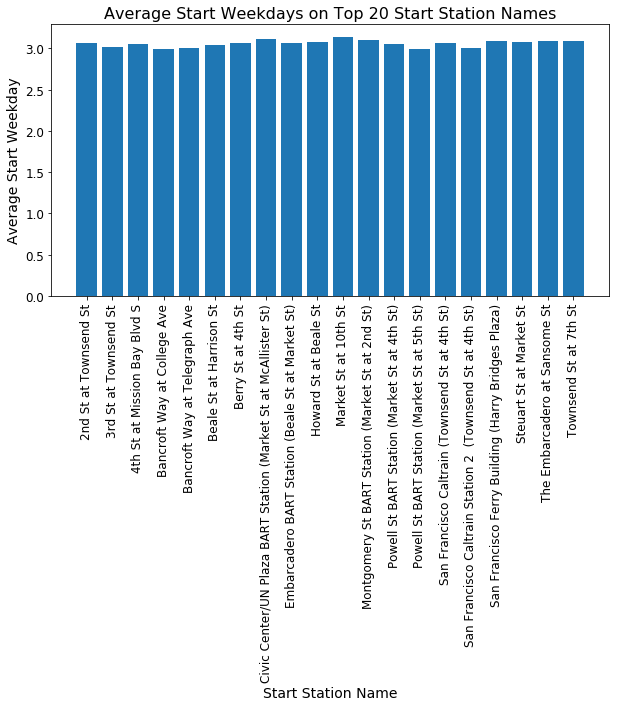

In [34]:


# Select the first 20 start station names and calculate the average start weekdays
top_20_start_stations = df['start_station_name'].value_counts().head(20).index
avg_start_weekdays = df[df['start_station_name'].isin(top_20_start_stations)].groupby('start_station_name')['start_weekday'].mean()

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(avg_start_weekdays.index, avg_start_weekdays.values)
plt.xlabel('Start Station Name', fontsize=14)
plt.ylabel('Average Start Weekday', fontsize=14)
plt.title('Average Start Weekdays on Top 20 Start Station Names', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Display the chart
plt.show()


Three represents Thursday and as we can see from above most stations are booked more on Thursday

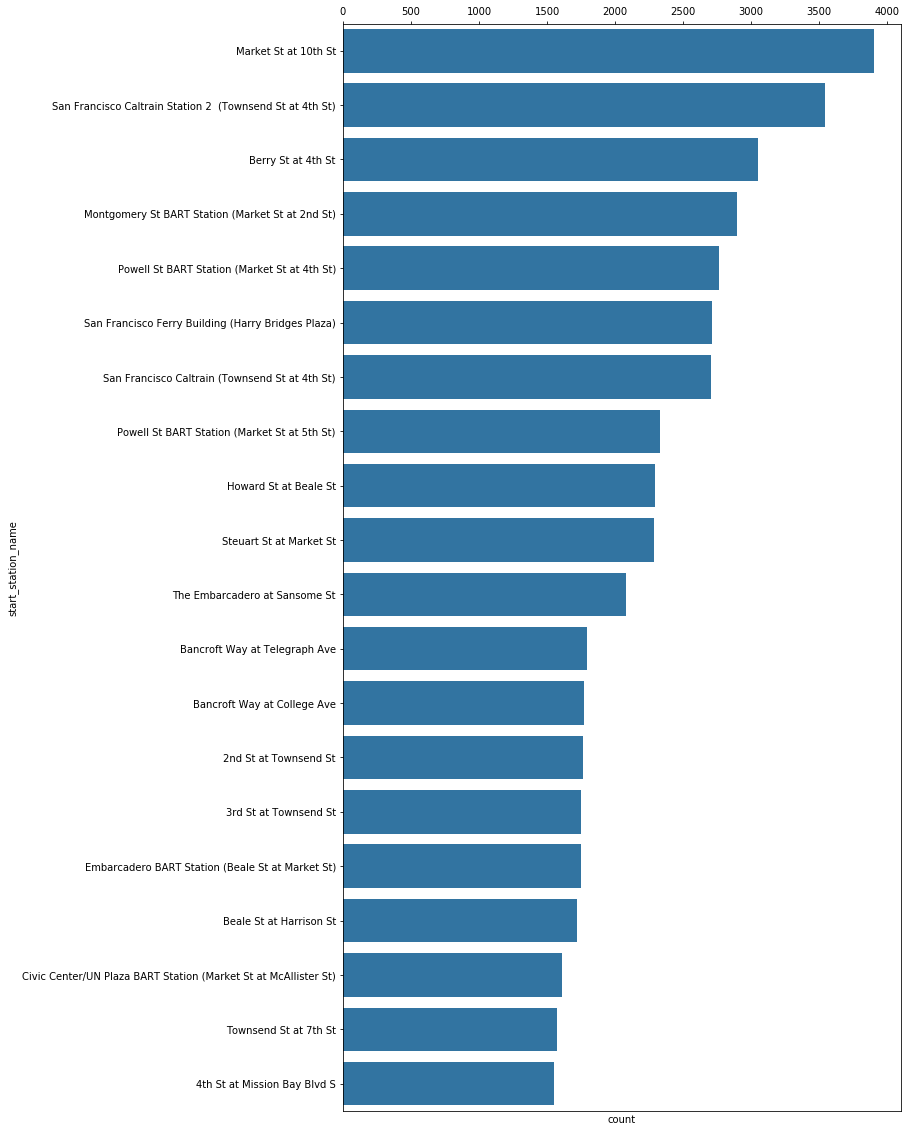

In [21]:
plt.figure(figsize = [10, 20])
start_station_order=df['start_station_name'].value_counts().index
sb.countplot(data=df , y = "start_station_name",order = start_station_order[:20],
            color=base_color);
plt.xticks(rotation=90)

plt.gca().xaxis.set_ticks_position('top')
plt.show()

We can see that Market St at 10th street and San Fransisco has the highest count of around 4000 based on the data we have sampled.This implies that most people take their trips from this station

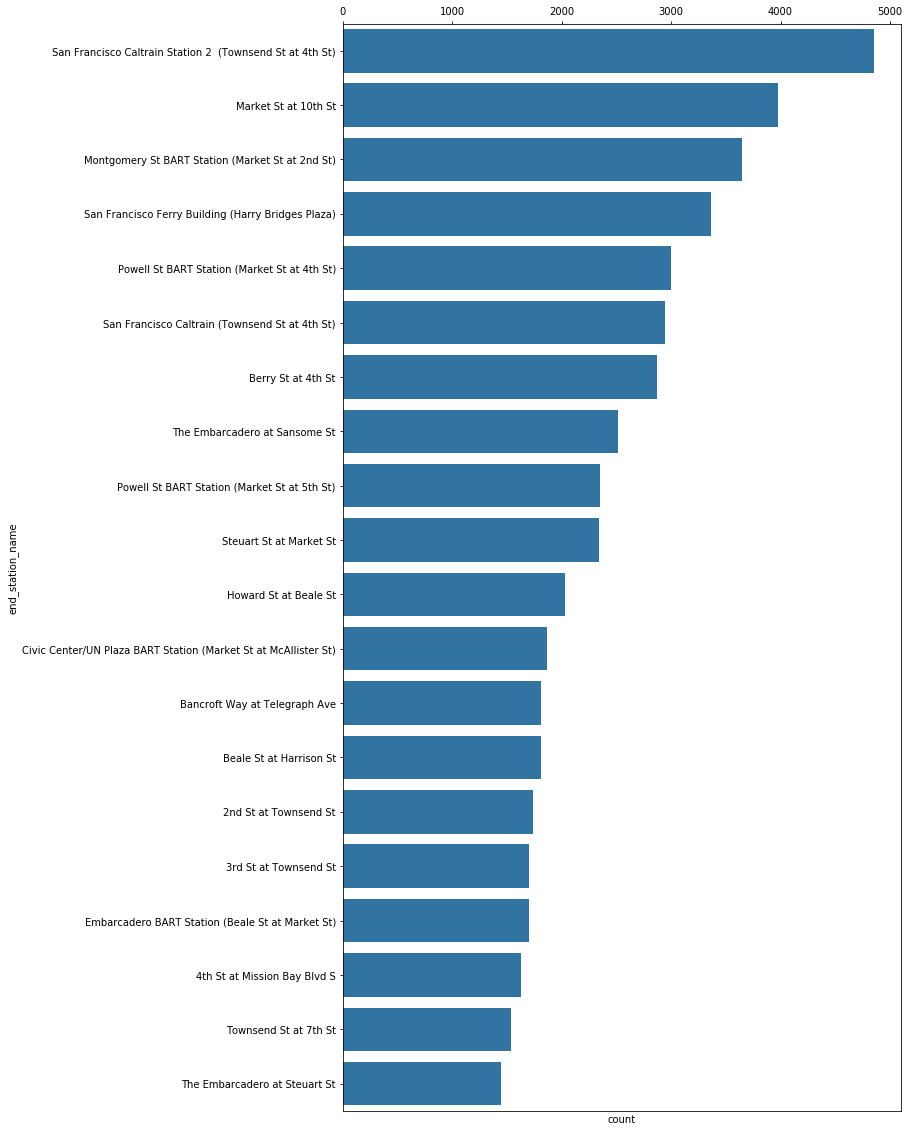

In [22]:
plt.figure(figsize = [10, 20])
end_station_order=df['end_station_name'].value_counts().index
sb.countplot(data=df , y = "end_station_name",order = end_station_order[:20],
            color=base_color);
plt.xticks(rotation=90)

plt.gca().xaxis.set_ticks_position('top')
plt.show()

We can conclude that san fransisco has the highest count of almost 5000 followed by market St at 10th street.Most people end their trip on the mentioned stations

In [23]:
df.dropna(axis=0,inplace=True)
df['user_age'] = df['user_age'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 28 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null object
start_year        

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> One of my columns of interest was the duration_sec column as i wanted to find out the average time it took for the bike rides.I ended up plotting a plot that was not widely spread enough to draw conclusions,hence opted to transform the secs to mins to have a more detailed plot 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I transformed the start_time and end_time columns to datetime so as to be able to extract the months,days and weeks so as to be able to make trends using plots that will define the output more

## Bivariate Exploration

RELATIONSHIP BETWEEN TRIP DURATION AND AGE

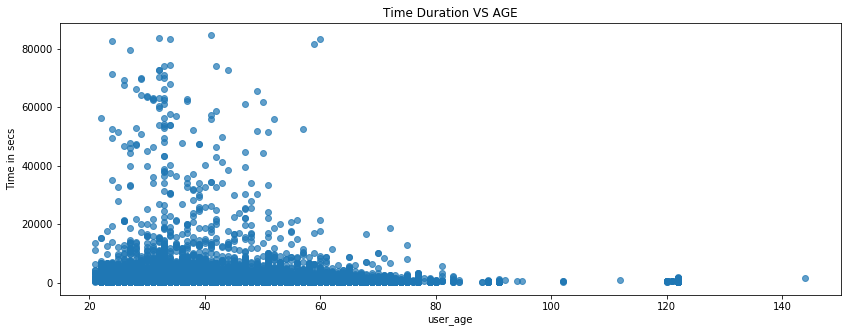

In [24]:
plt.figure(figsize=[14,5])
plt.scatter(data=df,x='user_age',y='duration_sec',alpha=0.7)
plt.xlabel('user_age')
plt.ylabel('Time in secs')
plt.title('Time Duration VS AGE');

Most of the people taking the trip are below 80 years and most people take less than 60000 secs in the trip

In [25]:
df['user_age'].max()

144

##### RELATIONSHIP BETWEEN AGE AND TIME

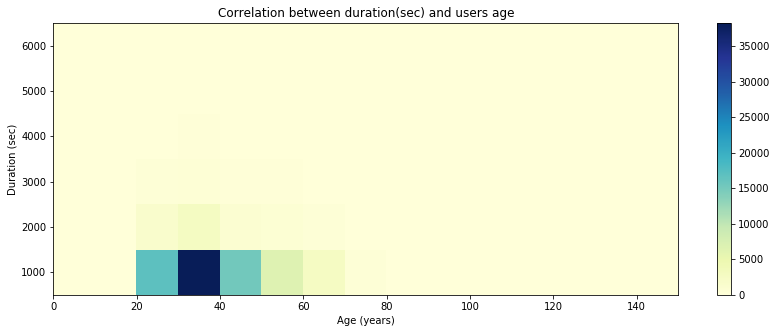

In [26]:
plt.figure(figsize=[14,5])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(0,150+1,10)
plt.hist2d(df['user_age'], df['duration_sec'],
           bins = [bins_x, bins_y],cmap='YlGnBu')

plt.title("Correlation between duration(sec) and users age")
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)')
plt.colorbar();

We can indeed confirm that most of the people taking this trip are around the age of 30years

###### Next,we will check the relationship between user_type and time duration

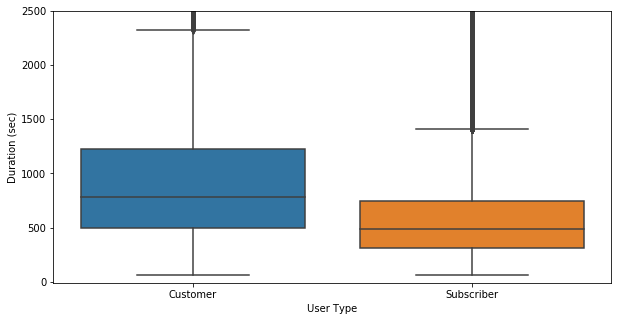

In [27]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec')
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');


> Customers take more time or spend more time taking trips than subscribers

#### RELATIONSHIP BETWEEN GENDER AND TIME DURATION

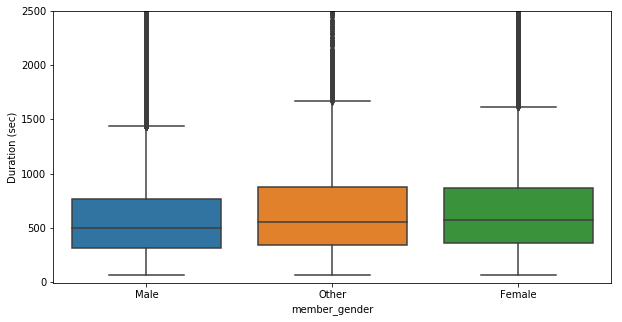

In [28]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec')
plt.ylim([-10, 2500])
plt.xlabel('member_gender')
plt.ylabel('Duration (sec)');

More females and other gender spent more time riding than the male

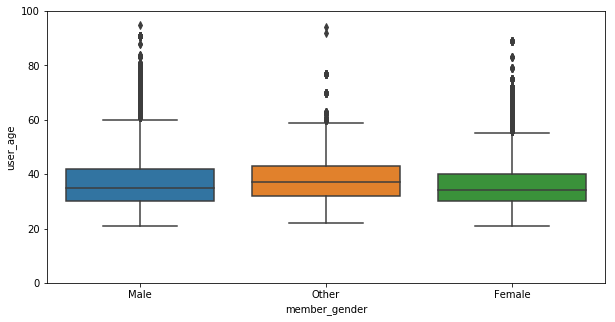

In [29]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df, x = 'member_gender', y = 'user_age')
plt.ylim([0, 100])
plt.xlabel('member_gender')
plt.ylabel('user_age');

There is more of the other gender who are above the age of 40 as compared to males and females

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> User Type: While Subscribers have higher number of users than the customer, looking at the correlation regarding longer durations of trips led to the conclusion that customers have higher percentage of leading a longer duration.                          
Gender: From the observation, male users are more than the others (other gender and female) but diving deeper revealed that while males take more trips, females and other gender have higher percentage of leading a longer trip than males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed the relationship between user age and time and concluded that at a certain age which is at 30,more time is spent taking trips and as expected,older people take less time as compared to younger ones

## Multivariate Exploration

#### WHICH GENDER TAKES MORE TIME IN RIDES COMPARED TO AGE

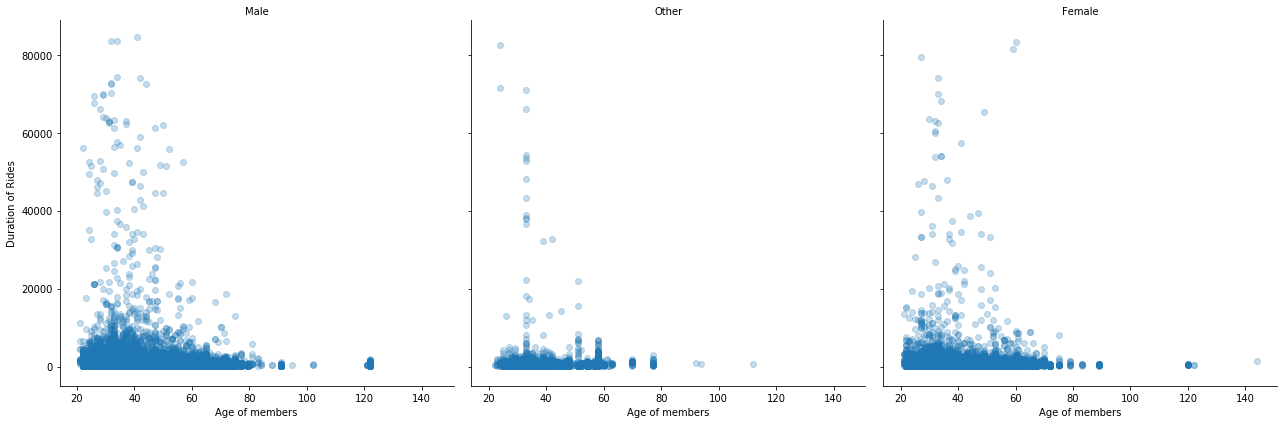

In [30]:
g = sb.FacetGrid(data = df, col = 'member_gender', size = 6,
                 col_wrap = 3)
g.map(sb.regplot, 'user_age', 'duration_sec', y_jitter = 0.05, fit_reg = False,
      scatter_kws = {'alpha' : 1/4})
g.set_ylabels('Duration of Rides')
g.set_xlabels('Age of members')
g.set_titles('{col_name}');

Here we note that there exists females at the age of 140 who are going for rides as compared to males and others who's maximum age is 120 as shown above.Most of both the males and females taking the trips are below the age of 80

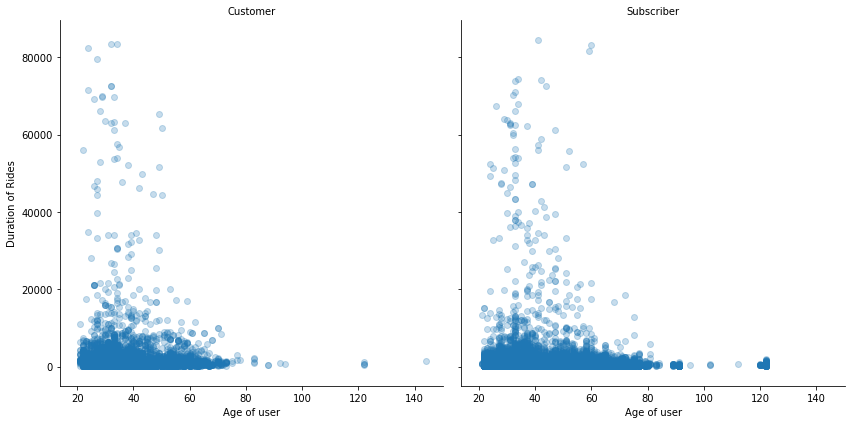

In [31]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 6,
                 col_wrap = 2)
g.map(sb.regplot, 'user_age', 'duration_sec', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/4})
g.set_ylabels('Duration of Rides')
g.set_xlabels('Age of user')
g.set_titles('{col_name}');

As shown above,most customers are between the age of about 20 to about 90  as compared to subscribers who lie between 20 and 80.Also,we can tell that they're more customers at the age of 80 than subscribers who are 80

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

 >duration_secs being one of my features of interest,the column member_gender has given more insight on the data since it has helped me figure out which gender takes the longest trips.We have seen that all genders strive to have a duration of 8000 secs 

### Were there any interesting or surprising interactions between features?
When I did the analysis on finding out which gender takes longer trips with age,i found that in females they can go past 140 years.i later proceeded to find out the user_type that takes longer with age and saw that there are also customers past the age of140.Therefore from this observation,we can conclude that there are female customers who are above the age of 140 as proven in the analysis



## Conclusions
1.Younger people spend more time taking trips than older people

2.Most people taking the trip are below the age of 80,a good number